In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd 

In [7]:
# windows korean font settings (code may vary based on your OS and available fonts)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 매출액 기반 상권 유형화

In [ ]:
# 골목상권, 발달상권 shp 파일 불러오기 

golmok = gpd.read_file("C:/Users/고양연구원/Desktop/지역경제/고양시_발달골목상권_SHAPE/골목상권_고양시_5181.shp", encoding='cp949')
baldal = gpd.read_file("C:/Users/고양연구원/Desktop/지역경제/고양시_발달골목상권_SHAPE/발달상권_고양시_5181.shp", encoding='cp949')
print(golmok.head())
print(baldal.head())

   trdar_id trdar_se_c tdmkt_clss trdar_nm main_biztp       min_xcrd  \
0      1860          2       None      지도로       None  184398.811692   
1      1083          2       None  고풍로43번길       None  181683.969308   
2      1117          2       None    신원로1길       None  190051.626481   
3      1045          2       None  지도로35번길       None  184142.107275   
4      1037          2       None     동산2로       None  189662.553056   

        min_ycrd       max_xcrd       max_ycrd      cntr_xcrd      cntr_ycrd  \
0  458315.993000  184820.248879  458811.215166  184569.984898  458565.776146   
1  462125.632490  182285.895708  462438.063794  181940.252876  462294.688334   
2  462272.438638  190333.563681  462561.059480  190192.559867  462417.285578   
3  457941.045400  184375.372020  458064.645588  184237.022676  458001.914856   
4  460329.347398  190029.134073  460605.716211  189869.886738  460465.846426   

        relm_ar   dong_cd reg_ymd  \
0  82623.448830  31101640    None   
1  94268.825

C:\Users\고양연구원\AppData\Local\Temp\ipykernel_10060\1341341159.py:5: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\고양연구원\AppData\Local\Temp\ipykernel_10060\1341341159.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, '고양시 골목상권 및 발달상권 분포')

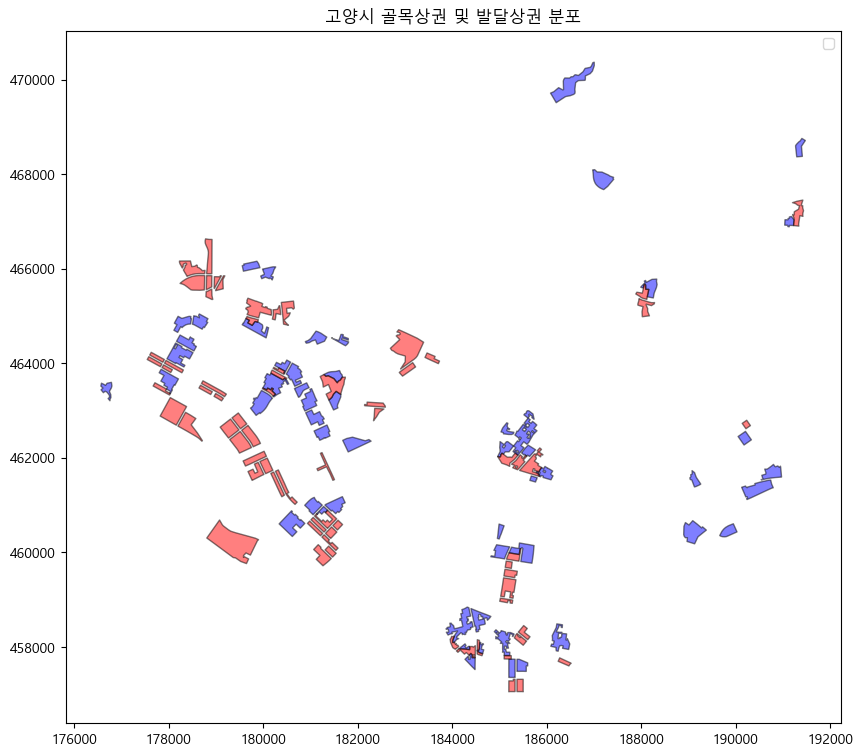

In [ ]:
# plot golmok and baldal markets on map 
fig, ax = plt.subplots(figsize=(10, 10))
golmok.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='골목상권')
baldal.plot(ax=ax, color='red', alpha=0.5, edgecolor='k', label='발달상권')
plt.legend()
plt.title('고양시 골목상권 및 발달상권 분포')

In [9]:
# merge golmok and baldal data for further analysis
golmok['type'] = '골목상권'
baldal['type'] = '발달상권'
markets = pd.concat([golmok, baldal], ignore_index=True)
markets

,trdar_id,trdar_se_c,tdmkt_clss,trdar_nm,main_biztp,min_xcrd,min_ycrd,max_xcrd,max_ycrd,cntr_xcrd,cntr_ycrd,relm_ar,dong_cd,reg_ymd,geometry,type
0,1860,2,None,지도로,None,184398.811692,458315.993000,184820.248879,458811.215166,184569.984898,458565.776146,82623.448830,31101640,None,"POLYGON ((184820.249 458644.852, 184797.69 458...",골목상권
1,1083,2,None,고풍로43번길,None,181683.969308,462125.632490,182285.895708,462438.063794,181940.252876,462294.688334,94268.825308,31103540,None,"POLYGON ((182238.802 462388.169, 182285.896 46...",골목상권
2,1117,2,None,신원로1길,None,190051.626481,462272.438638,190333.563681,462561.059480,190192.559867,462417.285578,41725.806250,31101520,None,"POLYGON ((190177.645 462272.439, 190051.626 46...",골목상권
3,1045,2,None,지도로35번길,None,184142.107275,457941.045400,184375.372020,458064.645588,184237.022676,458001.914856,12718.061469,31101640,None,"POLYGON ((184355.636 458013.449, 184364.985 45...",골목상권
4,1037,2,None,동산2로,None,189662.553056,460329.347398,190029.134073,460605.716211,189869.886738,460465.846426,57376.392454,31101580,None,"POLYGON ((189865.515 460360.335, 189809.775 46...",골목상권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,218,1,None,중앙로,None,178961.865212,463206.158834,179160.478000,463362.580676,179063.867152,463281.285898,13121.541628,31104550,None,"POLYGON ((179099.425 463301.958, 179160.478 46...",발달상권
122,684,1,None,백석역_5번출구,None,181013.197323,460429.471793,181335.018826,460740.407077,181152.575273,460605.911375,25682.444540,31103550,None,"POLYGON ((181283.147 460527.126, 181322.887 46...",발달상권
123,781,1,None,경의로,None,178796.280408,465559.687770,178915.193784,465856.983726,178857.772654,465725.997351,30390.181248,31104513,None,"POLYGON ((178915.194 465855.588, 178913.338 46...",발달상권
124,885,1,None,일산로_1,None,181476.559314,460474.273587,181682.134879,460681.643700,181579.404107,460578.497821,21139.504876,31103550,None,"POLYGON ((181622.641 460645.539, 181622.811 46...",발달상권


In [13]:
# export markets file 

markets.to_file("C:/Users/고양연구원/Desktop/지역경제/고양시_발달골목상권_SHAPE/고양시_골목발달상권_병합.geojson", driver='GeoJSON', encoding='utf-8')

In [22]:
# 매출액 및 매출건수 데이터 불러오기 

sales = pd.read_excel("C:/Users/고양연구원/Desktop/지역경제/상권분석/비스타(자료)/상권분석/고양상권분석/4.매출액(전체업종).xlsx")
sale_count = pd.read_excel("C:/Users/고양연구원/Desktop/지역경제/상권분석/비스타(자료)/상권분석/고양상권분석/5.매출건수(전체업종).xlsx")

# rename unnamed columns 
sales.rename(columns={'Unnamed: 0':'trdar_nm'}, inplace=True)
sale_count.rename(columns={'Unnamed: 0':'trdar_nm'}, inplace=True)

print(sales.head())
print(sale_count.head())

   trdar_nm   2024_07   2024_08   2024_09   2024_10   2024_11   2024_12  \
0  강성로232번길   4215849   4132453   4328175   4443071   4383079   4940075   
1  강송로113번길   4429148   4316051   4478202   4968802   5220723   5925385   
2   강송로73번길   8333720   8784287   8715394   8844597   8837636  10015606   
3       경의로   5829817   9349828   5610693   7546060   6612771   6321674   
4      고골길   15140476  14585979  15416681  14127032  15013466  14193804   

    2025_01   2025_02   2025_03   2025_04   2025_05     2025_06  
0   4147747   4058235   4731523   5118328   4861201   4230984.0  
1   5418594   4358764   4785486   5213276   5100096   5081805.0  
2   7887057   7187579   9165085   8326707   8730035   8045923.0  
3   5055976   5573560  13161970   8759443   8758844   8904348.0  
4  12999560  10795750  14171953  14025129  15101928  14057015.0  
   trdar_nm  2024_07  2024_08  2024_09  2024_10  2024_11  2024_12  2025_01  \
0  강성로232번길      193      180      189      200      183      179      169 

In [29]:
pd.options.display.float_format = '{:.3f}'.format

sales.describe()

,2024_07,2024_08,2024_09,2024_10,2024_11,2024_12,2025_01,2025_02,2025_03,2025_04,2025_05,2025_06
count,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,121.000
mean,14453449.246,14493155.377,13753143.344,14529103.893,14205582.041,15014954.107,13403341.918,12413575.836,14157848.533,13843420.713,14775773.008,13936993.413
std,28648555.185,26838982.394,21790482.404,25066158.887,25725600.029,28990865.688,22791434.154,19477594.412,21632180.098,19850664.956,23823625.671,23531527.976
min,710230.000,931282.000,750491.000,692347.000,246789.000,397112.000,298702.000,767904.000,671980.000,225825.000,292230.000,408913.000
25%,6163664.500,6249189.250,6255872.000,6307313.750,5824752.250,6147673.750,5599449.250,5109046.750,6335359.000,6036513.750,6862719.750,6127977.000
50%,8549540.500,8781692.500,8717526.500,9199122.500,8837455.500,9183721.000,8241351.500,7625724.000,9238983.000,8849726.000,9171029.500,8660734.000
75%,12741943.000,12957991.000,12564075.500,13190753.000,12118527.500,12870359.750,12190679.500,11204975.250,13391419.750,13419286.750,13918206.750,12970517.000
max,292665915.000,271101927.000,216209538.000,253676026.000,259669307.000,298040827.000,224540202.000,180910608.000,205076807.000,181128495.000,229747835.000,232704189.000


In [23]:
# merge markets data with sales data 
markets_sales = markets.merge(sales, left_on='trdar_nm', right_on='trdar_nm', how='left')
markets_sales

,trdar_id,trdar_se_c,tdmkt_clss,trdar_nm,main_biztp,min_xcrd,min_ycrd,max_xcrd,max_ycrd,cntr_xcrd,...,2024_09,2024_10,2024_11,2024_12,2025_01,2025_02,2025_03,2025_04,2025_05,2025_06
0,1860,2,None,지도로,None,184398.811692,458315.993000,184820.248879,458811.215166,184569.984898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1083,2,None,고풍로43번길,None,181683.969308,462125.632490,182285.895708,462438.063794,181940.252876,...,6531078.0,8768451.0,6056541.0,6479275.0,5312267.0,5546665.0,11011771.0,8256920.0,9108195.0,6148345.0
2,1117,2,None,신원로1길,None,190051.626481,462272.438638,190333.563681,462561.059480,190192.559867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1045,2,None,지도로35번길,None,184142.107275,457941.045400,184375.372020,458064.645588,184237.022676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1037,2,None,동산2로,None,189662.553056,460329.347398,190029.134073,460605.716211,189869.886738,...,5306360.0,5152343.0,4744266.0,4629182.0,4608084.0,4863290.0,5289473.0,5668560.0,5342883.0,5479688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,218,1,None,중앙로,None,178961.865212,463206.158834,179160.478000,463362.580676,179063.867152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,684,1,None,백석역_5번출구,None,181013.197323,460429.471793,181335.018826,460740.407077,181152.575273,...,11267170.0,12289386.0,11175062.0,11162059.0,9453823.0,9769684.0,10290953.0,11351028.0,10080276.0,9913806.0
123,781,1,None,경의로,None,178796.280408,465559.687770,178915.193784,465856.983726,178857.772654,...,5610693.0,7546060.0,6612771.0,6321674.0,5055976.0,5573560.0,13161970.0,8759443.0,8758844.0,8904348.0
124,885,1,None,일산로_1,None,181476.559314,460474.273587,181682.134879,460681.643700,181579.404107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(markets_sales.isnull().sum())
# print rows that have null values in sales columns


trdar_id        0
trdar_se_c      0
tdmkt_clss    126
trdar_nm        0
main_biztp    126
min_xcrd        0
min_ycrd        0
max_xcrd        0
max_ycrd        0
cntr_xcrd       0
cntr_ycrd       0
relm_ar         0
dong_cd         0
reg_ymd       126
geometry        0
type            0
2024_07        21
2024_08        21
2024_09        21
2024_10        21
2024_11        21
2024_12        21
2025_01        21
2025_02        21
2025_03        21
2025_04        21
2025_05        21
2025_06        22
dtype: int64
     trdar_id trdar_se_c tdmkt_clss trdar_nm main_biztp       min_xcrd  \
0        1860          2       None      지도로       None  184398.811692   
2        1117          2       None    신원로1길       None  190051.626481   
3        1045          2       None  지도로35번길       None  184142.107275   
22       1323          2       None  마상로57번길       None  185034.056595   
23       1325          2       None      토당로       None  184272.010575   
29       1360          2       None    